## 1. Exploratory Data Analysis (EDA)

The objective of this EDA is to prepare the SCATS dataset for regression by cleaning, encoding and scaling predictors. 

**Dataset Source:**  
This analysis uses data from the [DCC SCATS Detector Volume (Jul–Dec 2025)](https://data.smartdublin.ie/dataset/dcc-scats-detector-volume-jul-dec-2025)  
The dataset contains hourly vehicle counts recorded across multiple regions and detector sites in Dublin.

The dataset was chosen since it provides continuous hourly traffic data, making it suitable for regression modelling of vehicle volume. it also solves a real word problem, covering multiple regions in dublin offering meaningful predictors such as time,location and day of week


**Data Preparation:**

the dataset was checked for missing values and non were found therefore no imputation was necessary, categorical columns such as region and day of week were cleaned to fix any small formatting issues. 
outliers were inspected however we decided to keep them as they reprsent genuine rush hour peaks rather than errors

**Outcome:**
The preprocessed dataset includes 8 engineered spatial-temportal features, scaled and encoded within scikit pipeline to prevent data leakage during cross-validation. 


In [ ]:
import pandas as pd

# Load SCATS dataset
df = pd.read_csv(
    r"D:\UNI STUFF\YEAR3\SEM1\Advanced Machine Learning\CA1\SCATS_CA1_Subset.csv"
)

# Basic shape and preview
print("Shape:", df.shape)
df.head()


Shape: (539430, 8)


,End_Time,Region,Site,Detector,Sum_Volume,Hour,DayOfWeek,Month
0,2025-08-26 05:00:00,SCITY,275,6.0,0.0,5,Tuesday,8
1,2025-08-26 06:00:00,CCITY,663,15.0,0.0,6,Tuesday,8
2,2025-08-26 02:00:00,SCITY,139,21.0,0.0,2,Tuesday,8
3,2025-08-26 05:00:00,SCITY,615,22.0,0.0,5,Tuesday,8
4,2025-08-26 07:00:00,DCC1,4014,13.0,163.0,7,Tuesday,8


In [ ]:
# Check column types and confirm no missing values
df.info()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539430 entries, 0 to 539429
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   End_Time    539430 non-null  object 
 1   Region      539430 non-null  object 
 2   Site        539430 non-null  int64  
 3   Detector    539430 non-null  float64
 4   Sum_Volume  539430 non-null  float64
 5   Hour        539430 non-null  int64  
 6   DayOfWeek   539430 non-null  object 
 7   Month       539430 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 32.9+ MB


End_Time      0
Region        0
Site          0
Detector      0
Sum_Volume    0
Hour          0
DayOfWeek     0
Month         0
dtype: int64

In [ ]:
# View descriptive statistics for numeric columns
df.describe()
print(df['Region'].value_counts())
print(df['DayOfWeek'].value_counts())
print(df['Sum_Volume'].describe())

Region
IRE       120224
NCITY      85328
CCITY      85297
SCITY      82357
WCITY1     67843
DCC1       65984
IRE3       31695
DCC2         702
Name: count, dtype: int64
DayOfWeek
Friday       98862
Sunday       98478
Saturday     92902
Monday       73592
Thursday     61324
Wednesday    59492
Tuesday      54780
Name: count, dtype: int64
count    539430.000000
mean         41.067987
std         103.142207
min           0.000000
25%           0.000000
50%           0.000000
75%          18.000000
max        3020.000000
Name: Sum_Volume, dtype: float64


**Exploratory Insights**

the dataset contains over 539000 hourly records across eight regions, offering a great time series making it suitable for regression

`Sum_Volume` shows strong variation with the mean being 41 and STD being 103 indicating spare detector activity 

Traffic is unevenly distributed with regions like IRE and NCITY dominating the charts.

Such patterns support using ensemble regression that handle non-linear and irregular data effectively 


In [ ]:
# Inspect target variable behaviour and diversity
print(df['Sum_Volume'].describe())
print("Unique values:", df['Sum_Volume'].nunique())
print("Zero-traffic hours:", (df['Sum_Volume'] == 0).sum())


count    539430.000000
mean         41.067987
std         103.142207
min           0.000000
25%           0.000000
50%           0.000000
75%          18.000000
max        3020.000000
Name: Sum_Volume, dtype: float64
Unique values: 1091
Zero-traffic hours: 346546


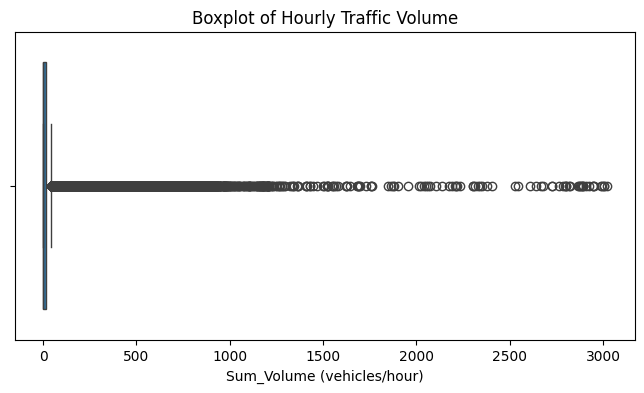

In [ ]:
# Inspect outliers visually for the target variable
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.boxplot(x=df['Sum_Volume'])
plt.title('Boxplot of Hourly Traffic Volume')
plt.xlabel('Sum_Volume (vehicles/hour)')
plt.show()


**Outlier Analysis**

The boxplot shows a strong right-skew in `Sum_Volume`, with  values extending beyond 3000 vehicles/hour.  

Such peaks represent real rush hour traffic rather than errors therefore they were kept in the dataset

removing them would ruin true congestion patterns and reduce the model's ability to capture peak-hour trends

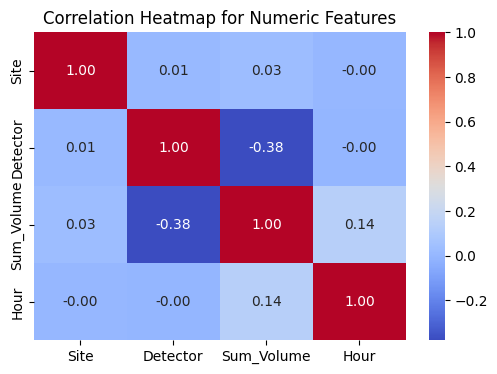

In [ ]:
# Correlation analysis for numeric features
numeric_cols = ['Site', 'Detector', 'Sum_Volume', 'Hour']
corr = df[numeric_cols].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numeric Features')
plt.show()


**Correlation and Data Validation**

The heatmap shows weak relationships between numeric features.
`Sum_Volume` has a small positive correlation with `Hour` and a slight negative one with `Detector`, since correlation is low , no dimensionality reduction was needed.
the dataset had over 500000 records across eight regions with no missing values. 

overall, the data is clean, balanced and ready to go through visual analysis

### 2. Data Visualisation

Traffic volume was explored across time and region to identify patterns and meaningful predictors of vehicle flow.  

Line plots, heatmaps, and bar charts were used to show temporal trends and spatial differences in traffic activity.
 
These visuals highlight commuter peaks, weekday–weekend variation, and regional imbalances, helping confirm which features are most relevant for modelling.


C:\Users\laith\AppData\Local\Temp\ipykernel_6492\954224060.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Hour', y='Sum_Volume', hue='Region', estimator='mean', ci=None)


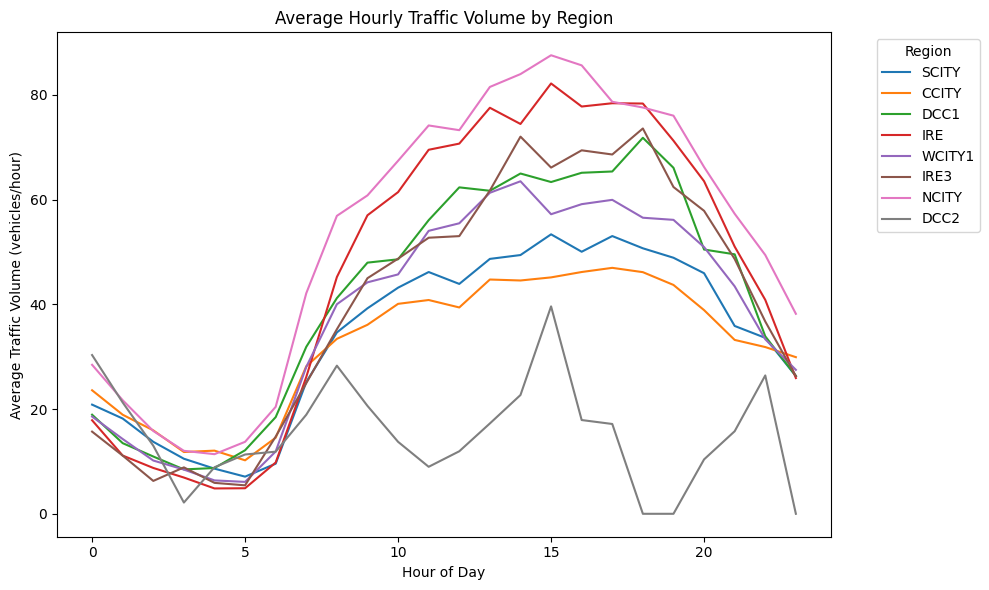

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Hour', y='Sum_Volume', hue='Region', estimator='mean', ci=None)
plt.title('Average Hourly Traffic Volume by Region')
plt.xlabel('Hour of Day')
plt.ylabel('Average Traffic Volume (vehicles/hour)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Traffic volume rises sharply between 7-9 and 5 pm hijglighting dublin's ruch hour


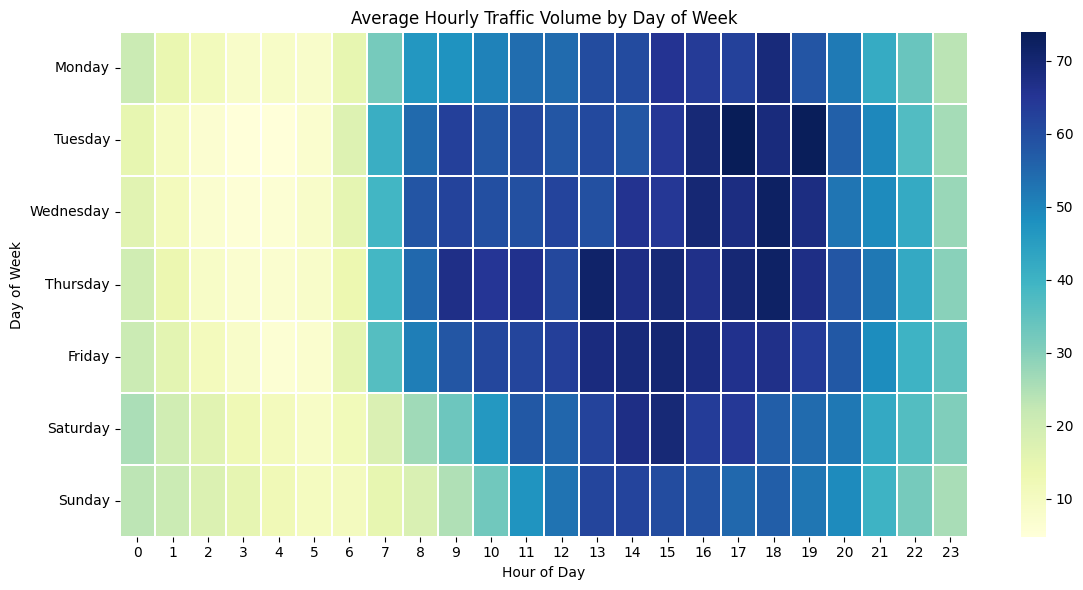

In [ ]:
# Ensure correct weekday order
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

pivot = df.pivot_table(values='Sum_Volume', index='DayOfWeek', columns='Hour', aggfunc='mean')
pivot = pivot.reindex(weekday_order)  # Order days

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap='YlGnBu', linewidths=0.3)
plt.title('Average Hourly Traffic Volume by Day of Week', fontsize=12)
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()


The heatmap shows sustained high traffic mid-week (Tuesday–Thursday) and a clear reduction at weekends.  
The heatmap also indicates that throughout most days of the week, 5 pm is mostly the busiest time of the day. 


C:\Users\laith\AppData\Local\Temp\ipykernel_6492\1326565130.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_avg.values, y=region_avg.index, palette='viridis')


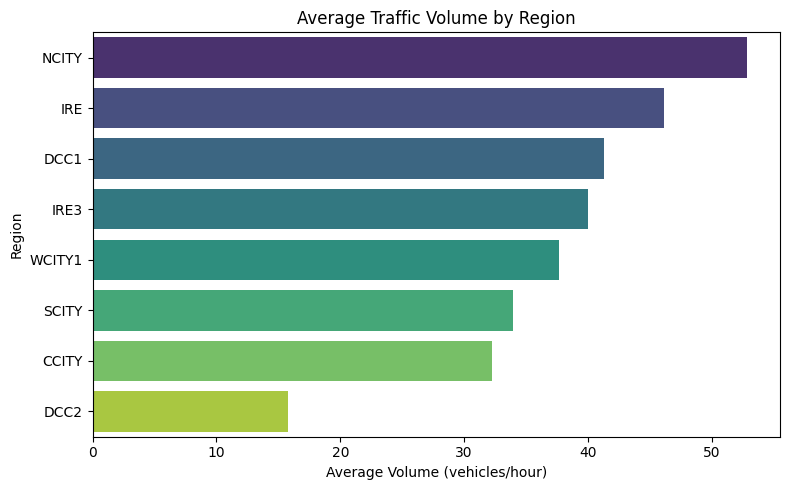

In [ ]:
plt.figure(figsize=(8,5))
region_avg = df.groupby('Region')['Sum_Volume'].mean().sort_values(ascending=False)
sns.barplot(x=region_avg.values, y=region_avg.index, palette='viridis')
plt.title('Average Traffic Volume by Region')
plt.xlabel('Average Volume (vehicles/hour)')
plt.ylabel('Region')
plt.tight_layout()
plt.show()


NCITY and IRE dominate total traffic volumes, indicating they act as regional hubs
Lower averages in outer regions such as DCC2 suggest fewer active detectors or lower vehicle flow, reinforcing the importance of spatial imbalance in data interpretation


C:\Users\laith\AppData\Local\Temp\ipykernel_6492\3107687669.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='DayOfWeek', y='Sum_Volume', hue='Region', ci=None, estimator='mean')


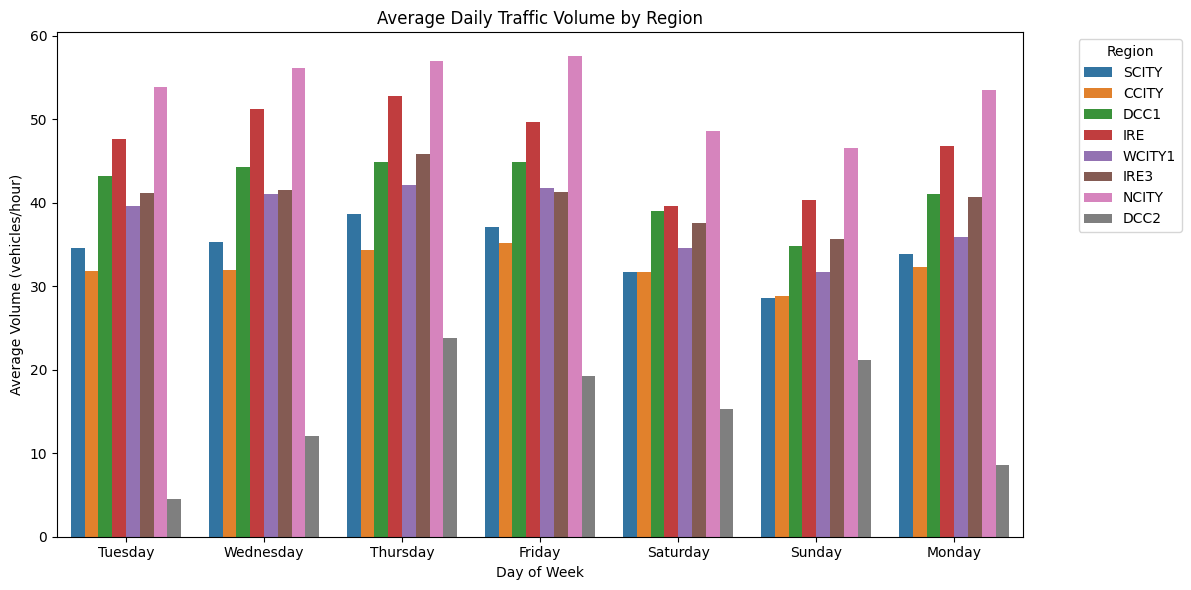

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='DayOfWeek', y='Sum_Volume', hue='Region', ci=None, estimator='mean')
plt.title('Average Daily Traffic Volume by Region')
plt.xlabel('Day of Week')
plt.ylabel('Average Volume (vehicles/hour)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Mid-week peaks appear across most regions , with NCITY and IRE typically exceeeding 50 Vehicles an Hour 
The consistent pattern fortifies the relation between region and day of the week


**Variability and Anomalies**
Traffic volumes differ significanly by region

NCITY and IRE are busiest while a region like DCC2 stays low, likely due to fewer indicaters 
The imbalance can affect model accuracy for low volume areas


## Model Creation and Evaluation

in this section we builds several regression models to predict total vehicle volume (`Sum_Volume`) across Dublin SCATS sites.  
we use a 10-fold cross-validation to find which one gives the highest R² score.



Data shape used for modelling: (100000, 8)

Model comparison results:
               Model   R2 Mean   MAE Mean  RMSE Mean
2  Gradient Boosting  0.461065  34.389067  74.675746
1      Random Forest  0.425717  35.439986  77.112852
0  Linear Regression  0.284020  50.779598  85.997495


C:\Users\laith\AppData\Local\Temp\ipykernel_6492\1296906333.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2 Mean', data=results_df, palette='viridis')


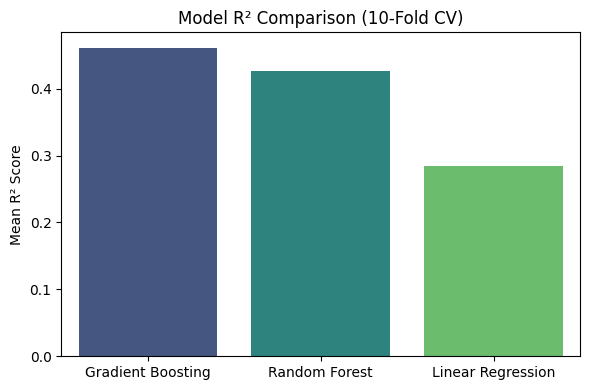

In [11]:
# Model Creation and Evaluation

import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for performance
if len(df) > 100_000:
    df = df.sample(100_000, random_state=42)
print("Data shape used for modelling:", df.shape)

# Define target and features
target = 'Sum_Volume'
categorical = ['Region', 'Site', 'DayOfWeek', 'Month']
numerical = ['Hour', 'Detector']
X = df[categorical + numerical]
y = df[target]

# Preprocess numeric and categorical features
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
])

# Define models with baseline
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(
        n_estimators=200,
        max_depth=20,
        min_samples_split=4,
        random_state=42,
        n_jobs=-1
    ),
    'Gradient Boosting': GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.08,
        max_depth=6,
        random_state=42
    )
}

# Set up 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scoring = {
    'r2': make_scorer(r2_score),
    'mae': make_scorer(mean_absolute_error),
    'mse': make_scorer(mean_squared_error)
}

# Run and evaluate models
results = []
for name, model in models.items():
    pipe = Pipeline(steps=[('prep', preprocessor), ('model', model)])
    cv_scores = cross_validate(pipe, X, y, cv=kf, scoring=scoring)
    results.append({
        'Model': name,
        'R2 Mean': cv_scores['test_r2'].mean(),
        'MAE Mean': cv_scores['test_mae'].mean(),
        'RMSE Mean': np.sqrt(cv_scores['test_mse'].mean())
    })

results_df = pd.DataFrame(results).sort_values('R2 Mean', ascending=False)
print("\nModel comparison results:")
print(results_df)

# Plot model performance
plt.figure(figsize=(6, 4))
sns.barplot(x='Model', y='R2 Mean', data=results_df, palette='viridis')
plt.title('Model R² Comparison (10-Fold CV)')
plt.ylabel('Mean R² Score')
plt.xlabel('')
plt.tight_layout()
plt.show()


**Model Interpretation**

Gradient Boosting gave the best performance (R² ≈ 0.46), explaining about half of the variation in hourly traffic volume.  
Both ensemble models beat the Linear Regression baseline indicating that a non linear method is the most suitable for this dataset
Gradient Boosting also had the lowest MAE and RMSE, showing more stable accuracy for peak-hour predictions.

**Limitations**

The humble R^2 score show that time and region alone are not the only factors influencing traffic variation
External factors such as weather, events and road incidents can play a factor however they are not included in the dataset 


## 4. Feature Selection

Feature selection is applied to identify key predictors while reducing redundancy.  
Two wrapper methods were tested  **Recursive Feature Elimination with CV (RFECV)** and **Sequential Forward Selection (SFS)** 



Feature Selection Comparison Results (sampled dataset):

             Model     MAE     RMSE     R2
0       RF (No FS)  38.156   85.564  0.326
2  SFS(Forward)+RF  41.241   89.461  0.257
1  RFECV(Ridge)+RF  58.660  102.821  0.013


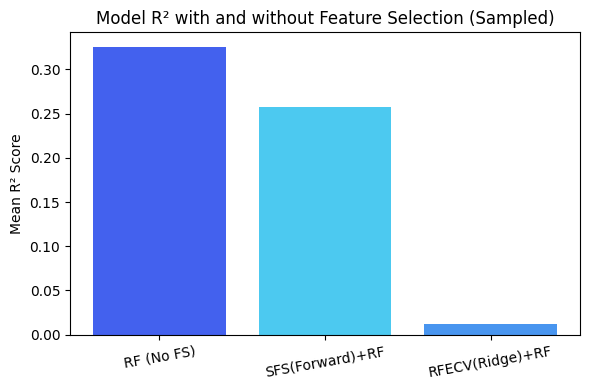

In [ ]:

import numpy as np, pandas as pd
from sklearn.model_selection import KFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV, SequentialFeatureSelector
import matplotlib.pyplot as plt

# Random 5k-row sample for speed
df_sample = df.sample(5000, random_state=42)

categorical, numerical = ['Region','Site','DayOfWeek','Month'], ['Hour','Detector']
target = 'Sum_Volume'
X, y = df_sample[categorical + numerical], df_sample[target]

#  Preprocessing 
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical)
])

rf = RandomForestRegressor(n_estimators=60, max_depth=10, random_state=42, n_jobs=-1)
cv = KFold(n_splits=2, shuffle=True, random_state=42)
scoring = {'mae':'neg_mean_absolute_error','mse':'neg_mean_squared_error','r2':'r2'}

rfecv = RFECV(Ridge(alpha=1.0), step=3, min_features_to_select=6,
              cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)

sfs = SequentialFeatureSelector(rf, n_features_to_select=6,
                                direction='forward', scoring='neg_mean_absolute_error',
                                cv=2, n_jobs=-1)

pipelines = {
    'RF (No FS)': Pipeline([('prep', preprocessor), ('model', rf)]),
    'RFECV(Ridge)+RF': Pipeline([('prep', preprocessor), ('sel', rfecv), ('model', rf)]),
    'SFS(Forward)+RF': Pipeline([('prep', preprocessor), ('sel', sfs), ('model', rf)])
}

results = []
for name, model in pipelines.items():
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    results.append({
        'Model': name,
        'MAE': -scores['test_mae'].mean(),
        'RMSE': np.sqrt(-scores['test_mse'].mean()),
        'R2': scores['test_r2'].mean()
    })

results_df = pd.DataFrame(results).sort_values('MAE')
print("\nFeature Selection Comparison Results (sampled dataset):\n")
print(results_df.round(3))

plt.figure(figsize=(6,4))
plt.bar(results_df['Model'], results_df['R2'], color=['#4361EE','#4CC9F0','#4895EF'])
plt.title("Model R² with and without Feature Selection (Sampled)")
plt.ylabel("Mean R² Score")
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()


### Feature Selection Interpretation

The baseline Random Forest performed best (R^2 = 0.33) suggesting that most predictors were initially relevant

SFS lowered accuracy, indicating that removing features improves efficiency yet loses useful info

RFECV performed worse most likely due to it removing too many features from the large one hot encoded dataset 

**Advantages:**  
- RFECV provides automated, data-driven ranking of feature importance.  
- SFS offers interpretability by adding features incrementally.  

**Limitations:**  
- RFECV took a long time to run and sometimes removed useful features.  
- SFS was time-consuming and not always consistent in picking the best combination of predictors.


Overall, results suggest that Random Forests naturally manage redundant features effectively.  

